## Stacked Minmax Plots for all labs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from scipy.stats import ks_2samp
%matplotlib inline
plt.style.use('ggplot')

In [2]:
labs = {'ALBUMIN': 'g/dL',
        'BICARBONATE': 'mEq/L',
        'BUN': 'mEq/L',
        'CALCIUM': 'mg/dL',
        'CHLORIDE': 'mEq/L',
        'CREATININE': 'mEq/L',
        'GLUCOSE': 'mg/dL',
        'HEMOGLOBIN': 'g/dL',
        'LACTATE': 'mmol/L',
        'MAGNESIUM': 'mmol/L',
        'PHOSPHATE': 'mg/dL',
        'PLATELET': 'K/uL',
        'POTASSIUM': 'mEq/L',
        'SODIUM':'mmol/L',
        'FREECALCIUM': 'mmol/L',
        'WBC': ''
       }

In [3]:
data = pd.read_csv("./all_data_minmax.csv", index_col=0)

In [4]:
LOS_med = data['los'].dropna().median()
#cond_less = (data.mort_icu==0) & (data.los < LOS_med)
cond_less = data.mort_icu == 0

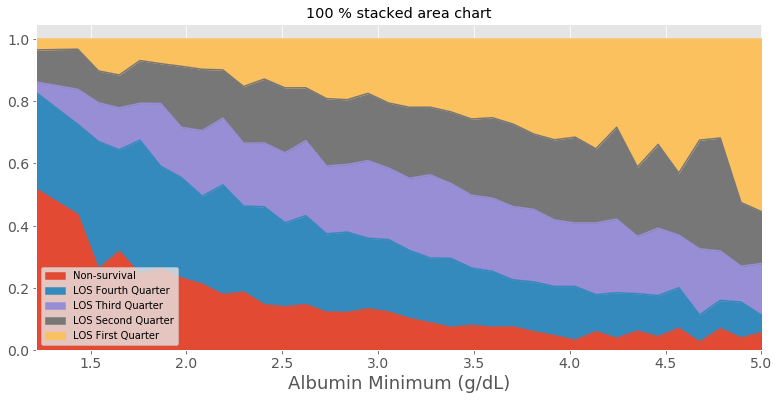

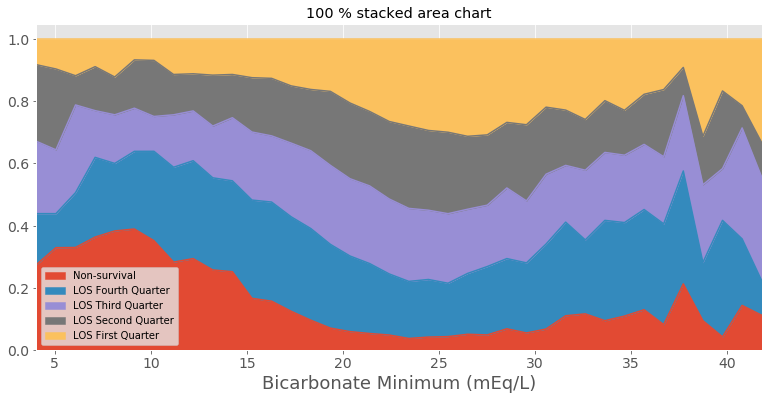

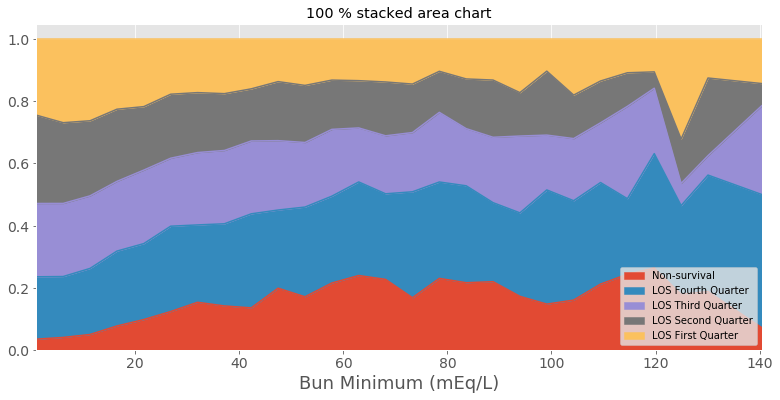

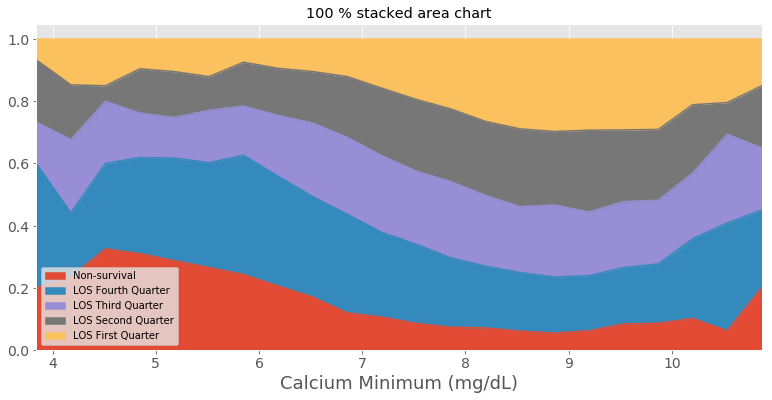

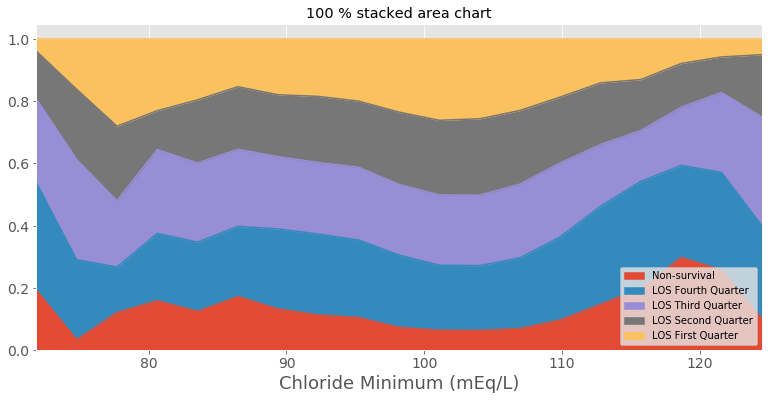

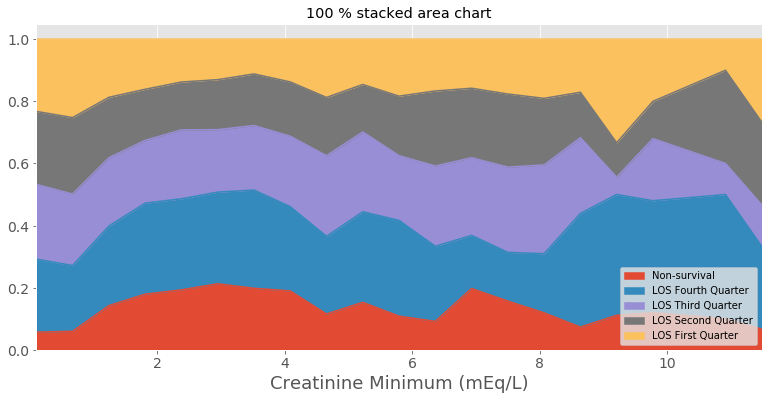

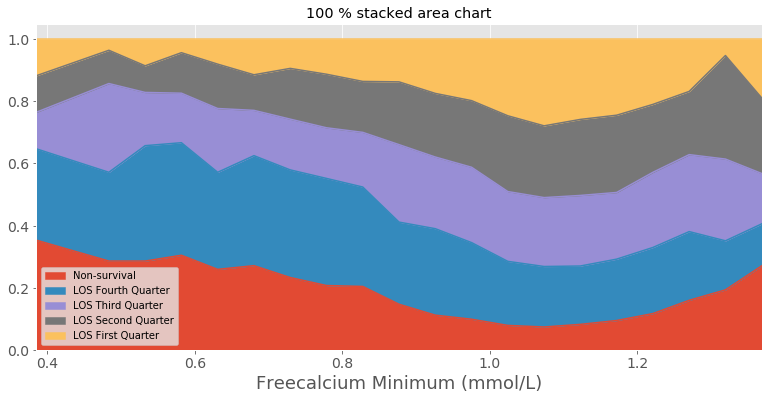

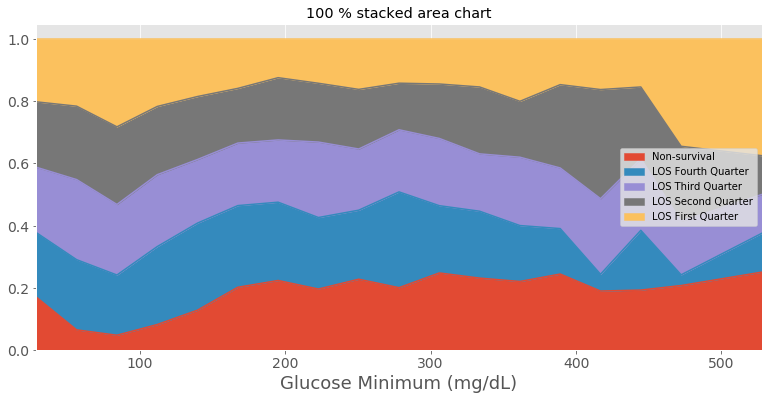

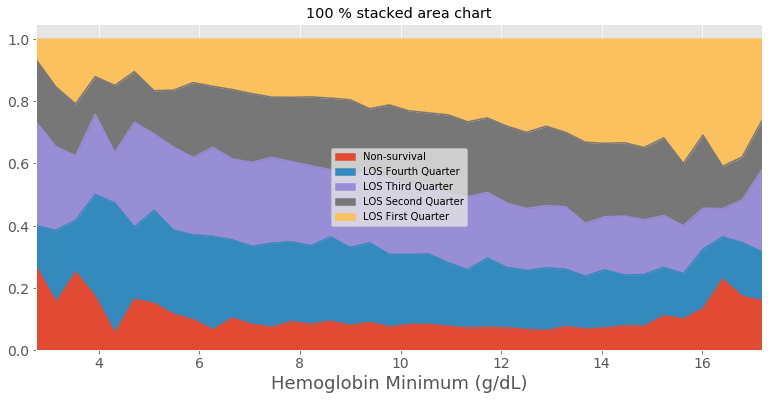

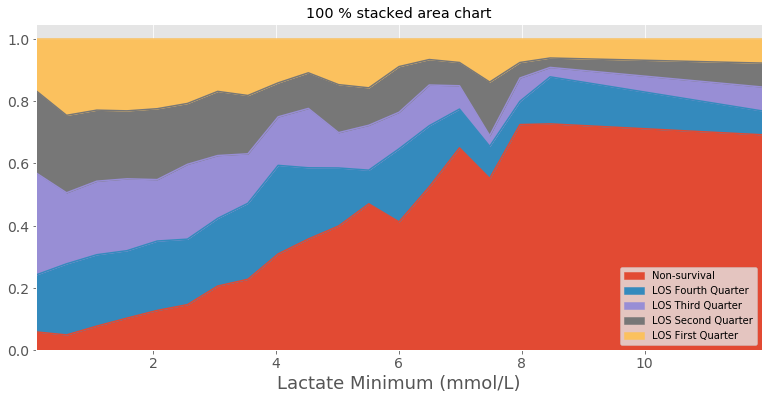

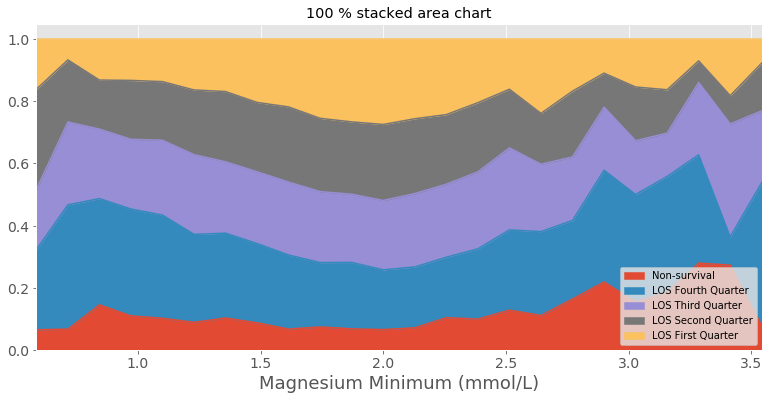

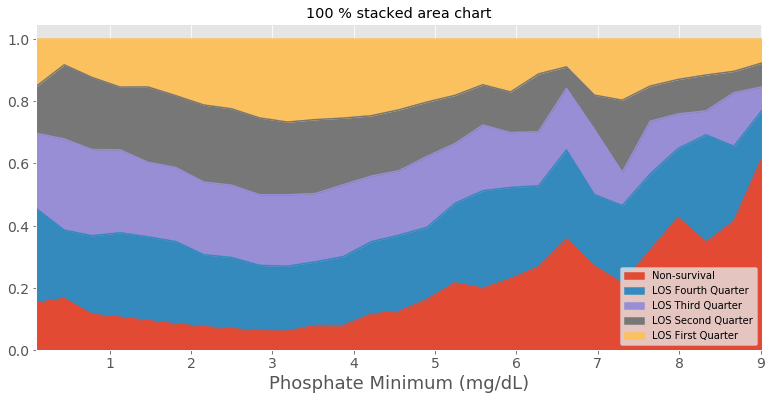

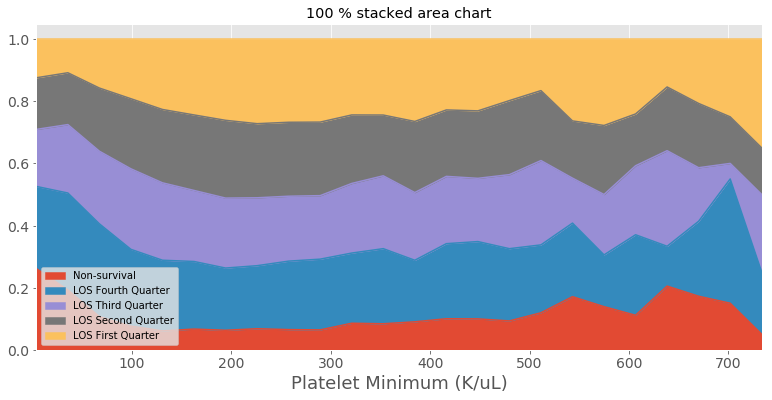

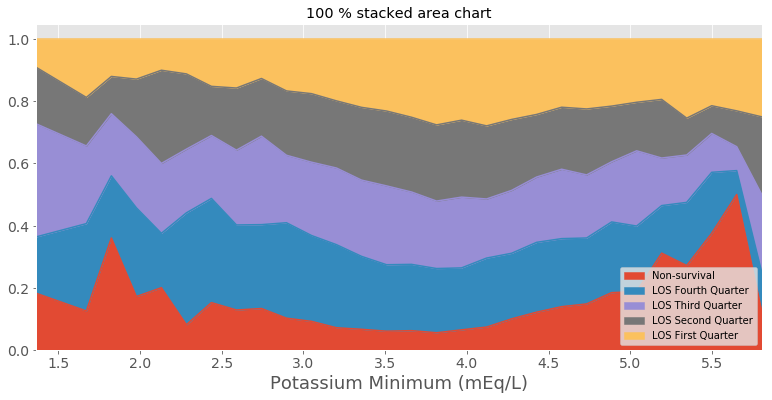

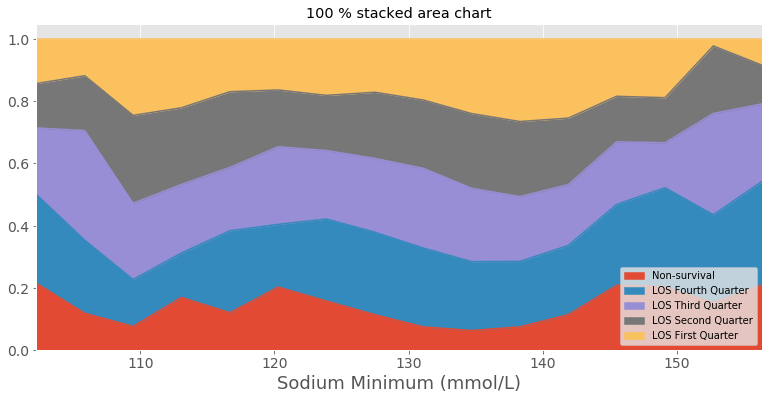

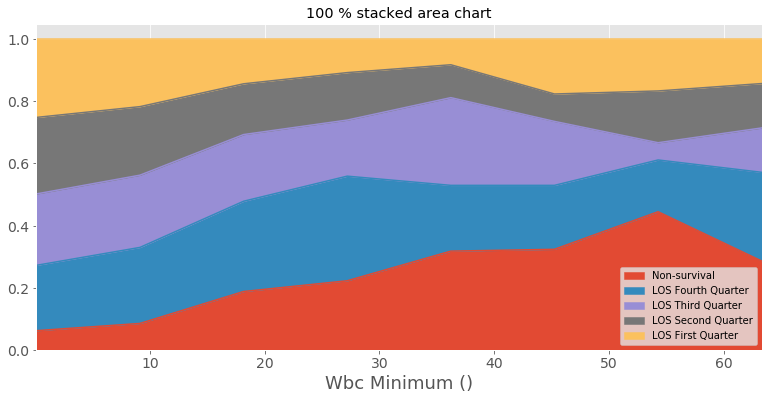

In [5]:
for l, u in iter(sorted(labs.iteritems())):
    n_nonsurv_min = data[l.lower()+'_min'][data.mort_icu==1].dropna().count()
    n_nonsurv_max = data[l.lower()+'_max'][data.mort_icu==1].dropna().count()
    n_less_min = data[l.lower()+'_min'][cond_less].dropna().count()
    n_less_max = data[l.lower()+'_max'][cond_less].dropna().count()
    quater = n_less_min / 4
    
    a1 = data[l.lower()+'_min'][data.mort_icu==1].quantile(0.025)
    a2 = data[l.lower()+'_min'][data.mort_icu==1].quantile(0.975)
    b1 = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].head(quater).quantile(0.025)
    b2 = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].head(quater).quantile(0.975)
    plot_a = max(a1, b1)
    plot_b = min(a2, b2)
    
    nonsurv_min = data[l.lower()+'_min'][data.mort_icu==1].dropna()
    nonsurv_max = data[l.lower()+'_max'][data.mort_icu==1].dropna()
    first_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna().head(quater)
    first_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna().head(quater)
    sec_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater:quater*2]
    sec_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater:quater*2]
    third_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*2:quater*3]
    third_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater*2:quater*3]
    fourth_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*3:]
    fourth_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater*3:]
    
    first_quater_min.values.sort()
    nonsurv_min.values.sort()
    first_quater_max.values.sort()
    nonsurv_max.values.sort()
    sec_quater_max.values.sort()
    sec_quater_min.values.sort()
    third_quater_max.values.sort()
    third_quater_min.values.sort()
    fourth_quater_max.values.sort()
    fourth_quater_min.values.sort()
    
    non_min = pd.Series(nonsurv_min.values, name='Non-survival')
    first_min = pd.Series(first_quater_min.values, name='First Quarter')
    non_max = pd.Series(nonsurv_max.values, name='Non-survival')
    first_max = pd.Series(first_quater_max.values, name='First Quarter')
    sec_min = pd.Series(sec_quater_min.values, name='Second Quarter')
    sec_max = pd.Series(sec_quater_max.values, name='Second Quarter')
    third_min = pd.Series(third_quater_min.values, name='Third Quarter')
    third_max = pd.Series(third_quater_max.values, name='Third Quarter')
    fourth_min = pd.Series(fourth_quater_min.values, name='Fourth Quarter')
    fourth_max = pd.Series(fourth_quater_max.values, name='Fourth Quarter')
    
    #df_min = first_min.to_frame().join(non_min.to_frame(), sec_min.to_frame(), third_min.to_frame(), fourth_min.to_frame())
    #df_max = first_max.to_frame().join(non_max.to_frame(), sec_max.to_frame(), third_max.to_frame(), fourth_max.to_frame())
    df_min = pd.DataFrame({'Non-survival': non_min, 'First Quarter': first_min, 'Second Quarter':sec_min, 'Third Quarter':third_min, 'Fourth Quarter':fourth_min})
    df_max = pd.DataFrame({'Non-survival': non_max, 'First Quarter': first_max, 'Second Quarter':sec_max, 'Third Quarter':third_max, 'Fourth Quarter':fourth_max})

    range1 = max(df_min['Non-survival'].max(), df_min['First Quarter'].max(), df_min['Second Quarter'].max(), df_min['Third Quarter'].max(), df_min['Fourth Quarter'].max())
    range2 = min(df_min['Non-survival'].min(), df_min['First Quarter'].min(), df_min['Second Quarter'].min(), df_min['Third Quarter'].min(), df_min['Fourth Quarter'].min())
    range3 = max(df_max['Non-survival'].max(), df_max['First Quarter'].max(), df_max['Second Quarter'].max(), df_max['Third Quarter'].max(), df_max['Fourth Quarter'].max())
    range4 = min(df_max['Non-survival'].min(), df_max['First Quarter'].min(), df_max['Second Quarter'].min(), df_max['Third Quarter'].min(), df_max['Fourth Quarter'].min())
    
    x_range_min = np.linspace(range1, range2, num=50)
    x_range_max = np.linspace(range3, range4, num=50)
    x_range_min = np.sort(x_range_min)
    x_range_max = np.sort(x_range_max)
    
    _df_min = pd.DataFrame(columns=['Non-survival', 'LOS Fourth Quarter', 'LOS Third Quarter', 'LOS Second Quarter', 'LOS First Quarter'])
    _df_max = pd.DataFrame(columns=['Non-survival', 'LOS Fourth Quarter', 'LOS Third Quarter', 'LOS Second Quarter', 'LOS First Quarter'])
    
    _df_min['range'] = x_range_min
    _df_max['range'] = x_range_max
    x_range_min = np.array(x_range_min)
    x_range_max = np.array(x_range_max)
    
    for index, row in _df_min.iterrows():
        count_non = 0
        count_1st = 0
        count_2nd = 0
        count_3rd = 0
        count_4th = 0 
        if row['range'] != x_range_min[-1]:
            for i in nonsurv_min.values:
                if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                    count_non += 1 
        if row['range'] != x_range_min[-1]:
            for i in first_quater_min.values:
                if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                    count_1st += 1 
        if row['range'] != x_range_min[-1]:
            for i in sec_quater_min.values:
                if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                    count_2nd += 1
        if row['range'] != x_range_min[-1]:
            for i in third_quater_min.values:
                if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                    count_3rd += 1
        if row['range'] != x_range_min[-1]:
            for i in fourth_quater_min.values:
                if i >= row['range'] and i < _df_min.iloc[index+1]['range']:
                    count_4th += 1

        _df_min.set_value(index, 'Non-survival', count_non)
        _df_min.set_value(index, 'LOS Fourth Quarter', count_4th)
        _df_min.set_value(index, 'LOS Third Quarter', count_3rd)
        _df_min.set_value(index, 'LOS Second Quarter', count_2nd)
        _df_min.set_value(index, 'LOS First Quarter', count_1st)
    _df2_min = _df_min.set_index(['range'])
    _df2_min = _df2_min[(_df2_min != 0).all(1)]
    _df3_min = _df2_min.divide(_df2_min.sum(axis=1), axis=0)
    _df3_min.plot(kind='area', stacked=True, title='100 % stacked area chart', figsize=(13, 6))
    plt.tick_params(axis='both', labelsize=14)
    fig = plt.gcf()
    ax = plt.gca()
    plt.xlabel(l[0]+l[1:].lower()+' Minimum ('+u+')', fontsize=18)

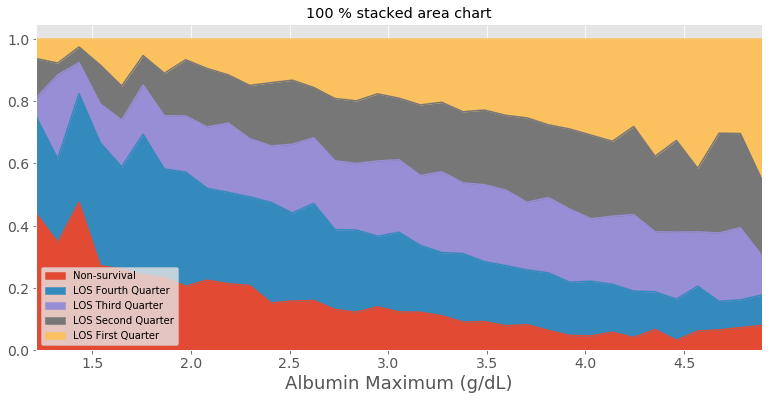

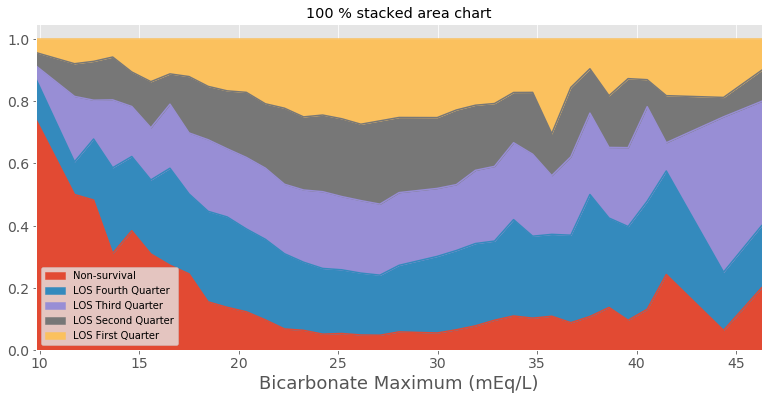

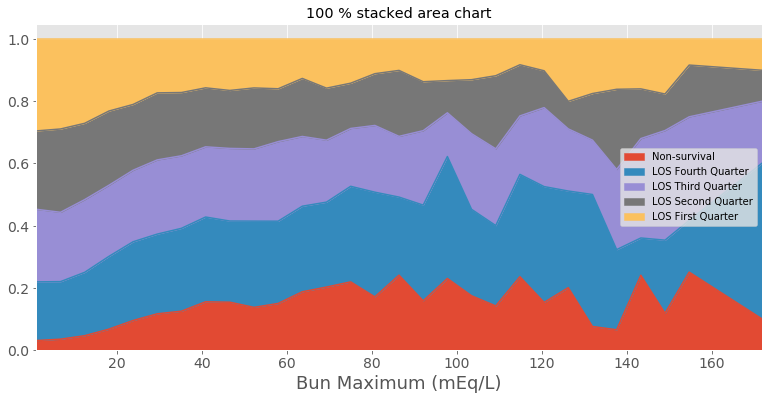

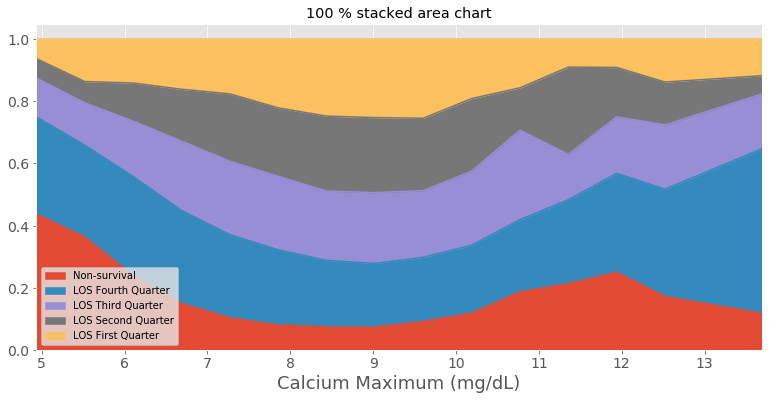

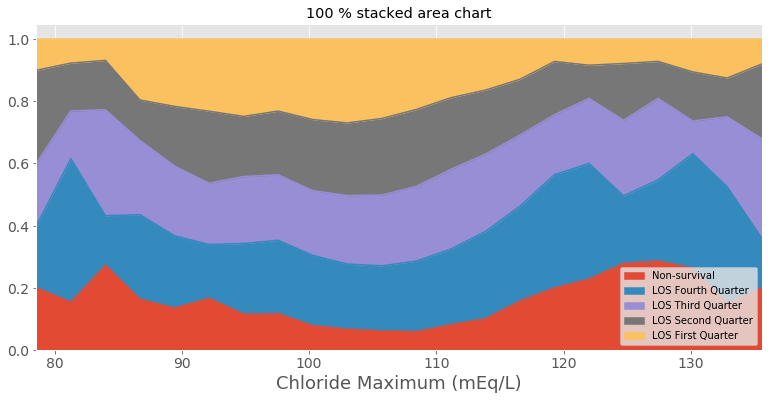

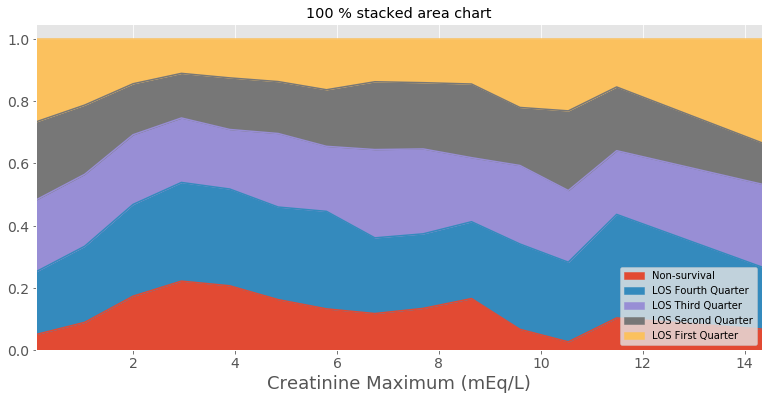

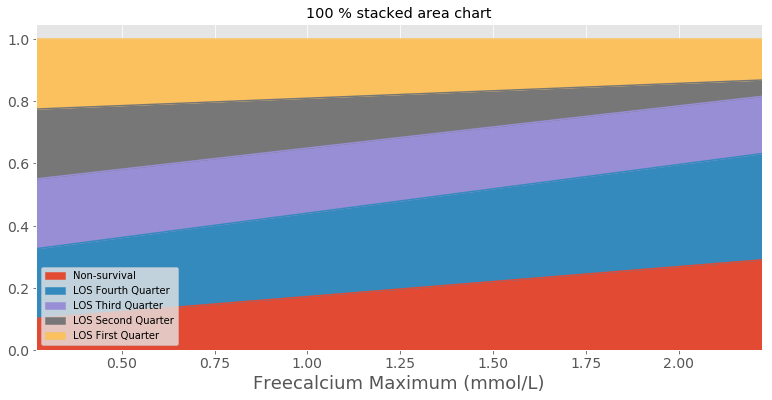

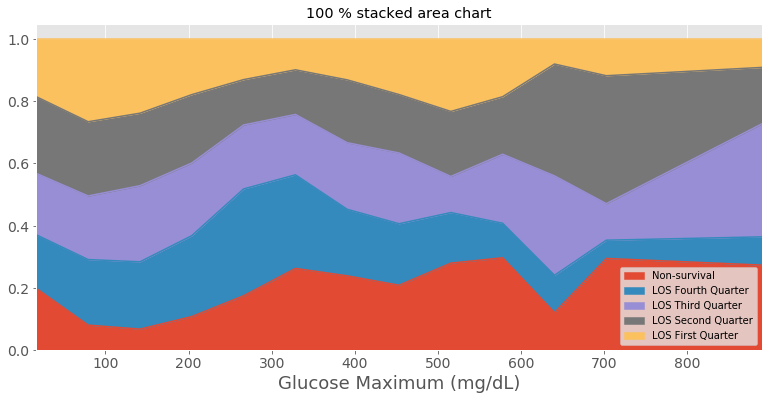

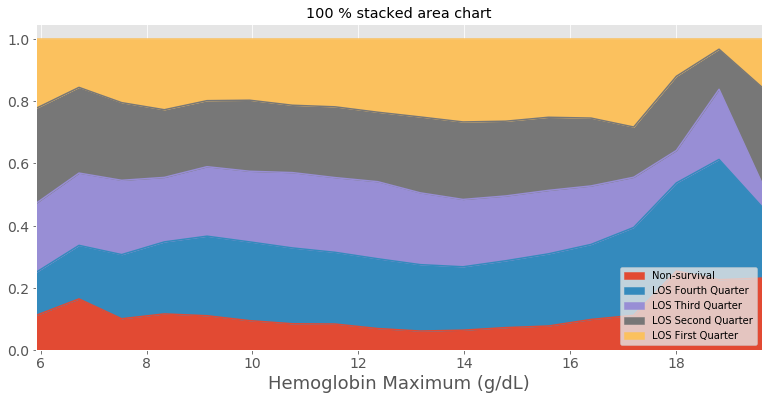

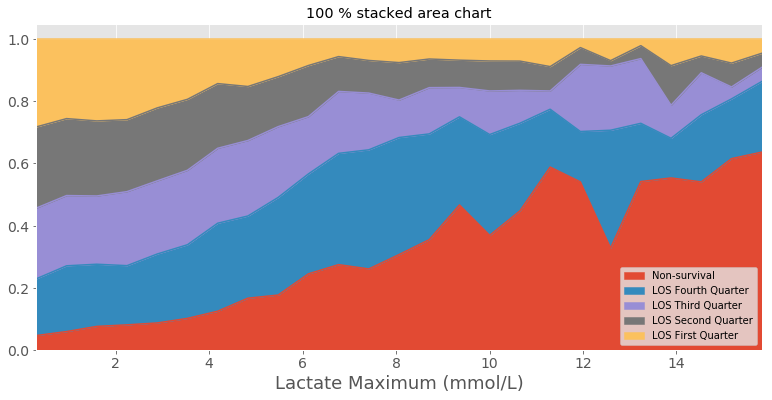

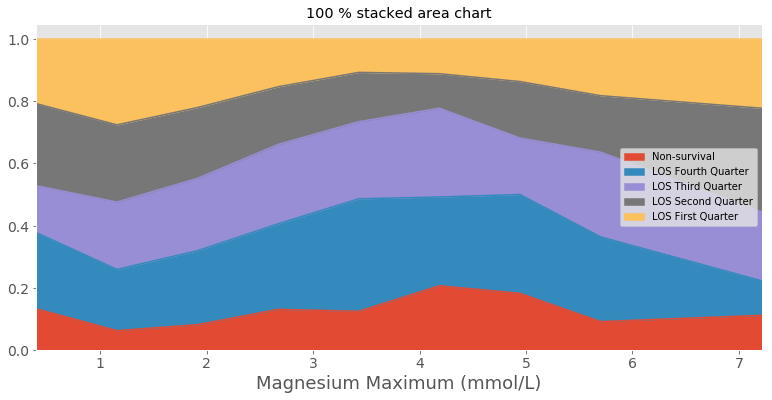

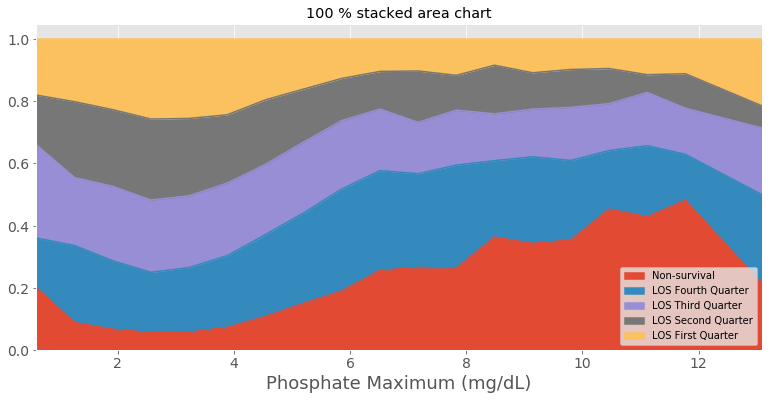

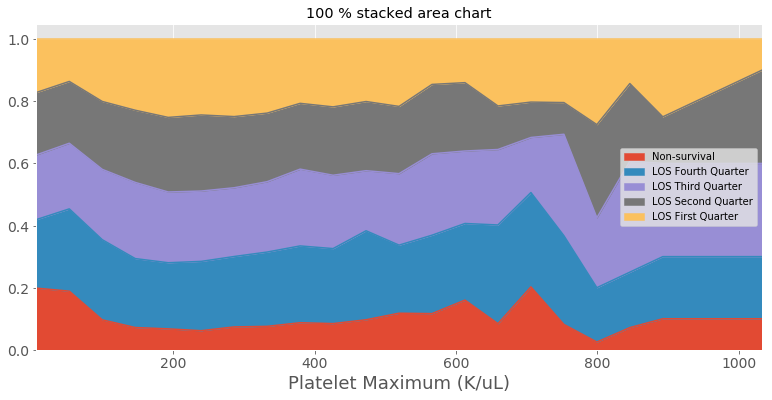

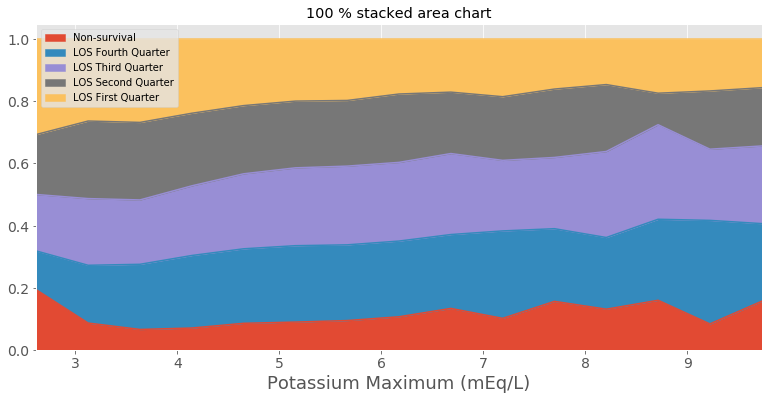

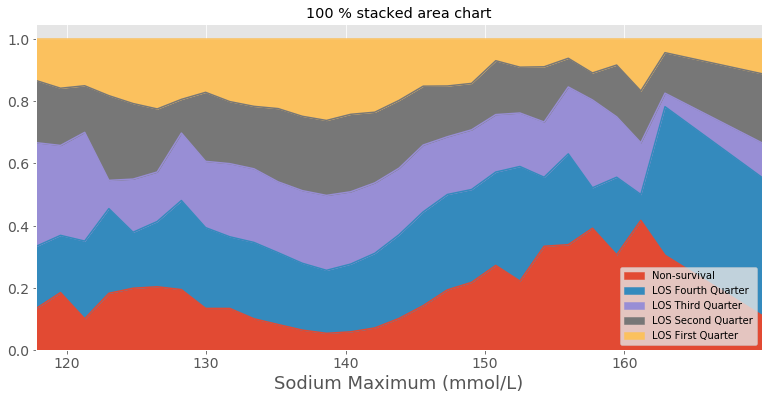

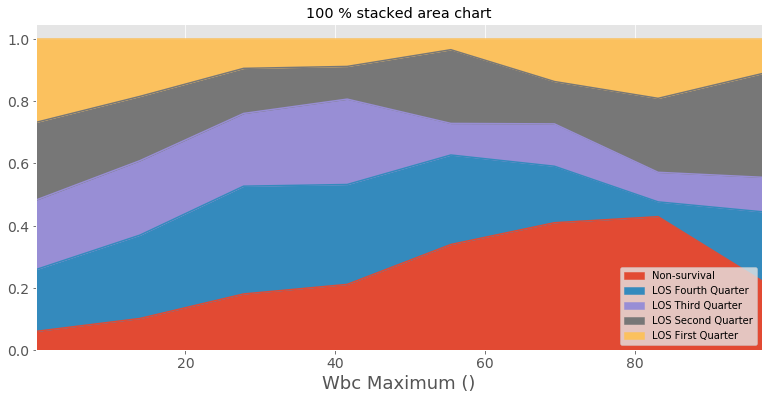

In [6]:
for l, u in iter(sorted(labs.iteritems())):
    n_nonsurv_min = data[l.lower()+'_min'][data.mort_icu==1].dropna().count()
    n_nonsurv_max = data[l.lower()+'_max'][data.mort_icu==1].dropna().count()
    n_less_min = data[l.lower()+'_min'][cond_less].dropna().count()
    n_less_max = data[l.lower()+'_max'][cond_less].dropna().count()
    quater = n_less_min / 4
    
    a1 = data[l.lower()+'_max'][data.mort_icu==1].quantile(0.025)
    a2 = data[l.lower()+'_max'][data.mort_icu==1].quantile(0.975)
    b1 = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].head(quater).quantile(0.025)
    b2 = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].head(quater).quantile(0.975)
    plot_a = max(a1, b1)
    plot_b = min(a2, b2)
    
    nonsurv_min = data[l.lower()+'_min'][data.mort_icu==1].dropna()
    nonsurv_max = data[l.lower()+'_max'][data.mort_icu==1].dropna()
    first_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna().head(quater)
    first_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna().head(quater)
    sec_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater:quater*2]
    sec_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater:quater*2]
    third_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*2:quater*3]
    third_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater*2:quater*3]
    fourth_quater_min = data.sort_values(by=['los'])[l.lower()+'_min'][cond_less].dropna()[quater*3:]
    fourth_quater_max = data.sort_values(by=['los'])[l.lower()+'_max'][cond_less].dropna()[quater*3:]
    
    first_quater_min.values.sort()
    nonsurv_min.values.sort()
    first_quater_max.values.sort()
    nonsurv_max.values.sort()
    sec_quater_max.values.sort()
    sec_quater_min.values.sort()
    third_quater_max.values.sort()
    third_quater_min.values.sort()
    fourth_quater_max.values.sort()
    fourth_quater_min.values.sort()
    
    non_min = pd.Series(nonsurv_min.values, name='Non-survival')
    first_min = pd.Series(first_quater_min.values, name='First Quarter')
    non_max = pd.Series(nonsurv_max.values, name='Non-survival')
    first_max = pd.Series(first_quater_max.values, name='First Quarter')
    sec_min = pd.Series(sec_quater_min.values, name='Second Quarter')
    sec_max = pd.Series(sec_quater_max.values, name='Second Quarter')
    third_min = pd.Series(third_quater_min.values, name='Third Quarter')
    third_max = pd.Series(third_quater_max.values, name='Third Quarter')
    fourth_min = pd.Series(fourth_quater_min.values, name='Fourth Quarter')
    fourth_max = pd.Series(fourth_quater_max.values, name='Fourth Quarter')
    
    #df_min = first_min.to_frame().join(non_min.to_frame())
    #df_max = first_max.to_frame().join(non_max.to_frame())
    df_min = pd.DataFrame({'Non-survival': non_min, 'First Quarter': first_min, 'Second Quarter':sec_min, 'Third Quarter':third_min, 'Fourth Quarter':fourth_min})
    df_max = pd.DataFrame({'Non-survival': non_max, 'First Quarter': first_max, 'Second Quarter':sec_max, 'Third Quarter':third_max, 'Fourth Quarter':fourth_max})

    range1 = max(df_min['Non-survival'].max(), df_min['First Quarter'].max(), df_min['Second Quarter'].max(), df_min['Third Quarter'].max(), df_min['Fourth Quarter'].max())
    range2 = min(df_min['Non-survival'].min(), df_min['First Quarter'].min(), df_min['Second Quarter'].min(), df_min['Third Quarter'].min(), df_min['Fourth Quarter'].min())
    range3 = max(df_max['Non-survival'].max(), df_max['First Quarter'].max(), df_max['Second Quarter'].max(), df_max['Third Quarter'].max(), df_max['Fourth Quarter'].max())
    range4 = min(df_max['Non-survival'].min(), df_max['First Quarter'].min(), df_max['Second Quarter'].min(), df_max['Third Quarter'].min(), df_max['Fourth Quarter'].min())
    
    x_range_min = np.linspace(range1, range2, num=50)
    x_range_max = np.linspace(range3, range4, num=50)
    x_range_min = np.sort(x_range_min)
    x_range_max = np.sort(x_range_max)
    
    _df_min = pd.DataFrame(columns=['Non-survival', 'LOS Fourth Quarter', 'LOS Third Quarter', 'LOS Second Quarter', 'LOS First Quarter'])
    _df_max = pd.DataFrame(columns=['Non-survival', 'LOS Fourth Quarter', 'LOS Third Quarter', 'LOS Second Quarter', 'LOS First Quarter'])
    
    _df_min['range'] = x_range_min
    _df_max['range'] = x_range_max
    x_range_min = np.array(x_range_min)
    x_range_max = np.array(x_range_max)
    
    for index, row in _df_max.iterrows():
        count_non = 0
        count_1st = 0
        count_2nd = 0
        count_3rd = 0
        count_4th = 0 
        if row['range'] != x_range_max[-1]:
            for i in nonsurv_max.values:
                if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                    count_non += 1 
        if row['range'] != x_range_max[-1]:
            for i in first_quater_max.values:
                if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                    count_1st += 1 
        if row['range'] != x_range_max[-1]:
            for i in sec_quater_max.values:
                if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                    count_2nd += 1
        if row['range'] != x_range_max[-1]:
            for i in third_quater_max.values:
                if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                    count_3rd += 1
        if row['range'] != x_range_max[-1]:
            for i in fourth_quater_max.values:
                if i >= row['range'] and i < _df_max.iloc[index+1]['range']:
                    count_4th += 1

        _df_max.set_value(index, 'Non-survival', count_non)
        _df_max.set_value(index, 'LOS Fourth Quarter', count_4th)
        _df_max.set_value(index, 'LOS Third Quarter', count_3rd)
        _df_max.set_value(index, 'LOS Second Quarter', count_2nd)
        _df_max.set_value(index, 'LOS First Quarter', count_1st)
    
    _df2_max = _df_max.set_index(['range'])
    _df2_max = _df2_max[(_df2_max != 0).all(1)]
    _df3_max = _df2_max.divide(_df2_max.sum(axis=1), axis=0)
    _df3_max.plot(kind='area', stacked=True, title='100 % stacked area chart', figsize=(13, 6))
    plt.tick_params(axis='both', labelsize=14)
    fig = plt.gcf()
    ax = plt.gca()
    plt.xlabel(l[0]+l[1:].lower()+' Maximum ('+u+')', fontsize=18)